In [21]:
import pathlib
import os

In [22]:
path = r"C:\Users\divya\OneDrive\Desktop\data allergy predict"
print(os.listdir(path))

['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '2. Melanoma 15.75k', '3. Atopic Dermatitis - 1.25k', '4. Basal Cell Carcinoma (BCC) 3323', '5. Melanocytic Nevi (NV) - 7970', '6. Benign Keratosis-like Lesions (BKL) 2624', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k', 'app.py', 'requirements.txt', 'skin_cnn.ipynb', 'skin_cnn_model.keras', 'static', 'templates']


In [23]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow import keras

In [ ]:
# Data Augmentation (model ko smarter banata hai)
# Early Stopping (best model automatically choose hota hai)
# Learning Curve Graphs (accuracy/loss ka simple plot)

In [24]:
#dataset load ---- read images nd labels
data_dir = r"C:\Users\divya\OneDrive\Desktop\data allergy predict"

img_size = (180,180)         #Har image ko 180x180 size me convert karo
batch_size = 32             #Batch size = ek baar me 32 images model ko dene

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size = img_size,
    batch_size = batch_size
)

#Tumhare folder ko scan karta hai
 #Har class ka name read karta hai
#images ko tensors (matrices) me convert karta hai
# Sabko resize karta hai 180 × 180
# 80% training ke liye deta hai
# 20% validation ke liye

Found 27155 files belonging to 12 classes.
Using 21724 files for training.


In [25]:
print("Class Names:", train_ds.class_names)

Class Names: ['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '2. Melanoma 15.75k', '3. Atopic Dermatitis - 1.25k', '4. Basal Cell Carcinoma (BCC) 3323', '5. Melanocytic Nevi (NV) - 7970', '6. Benign Keratosis-like Lesions (BKL) 2624', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k', 'static', 'templates']


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 42,
    image_size = img_size,
    batch_size = batch_size
)   

##TensorFlow automatically does:

#Reads all images

#Detects folder names as labels

#Splits into train/validation

#Resizes images

#Creates batches

#Converts to tensors

Found 27155 files belonging to 12 classes.
Using 5431 files for validation.


In [31]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),       # Image flip
    layers.RandomRotation(0.1),            # Slight rotation
    layers.RandomZoom(0.1),                # Slight zoom
])

In [27]:
# --- INSERT THIS CODE SNIPPET ---
from sklearn.utils import class_weight
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
print("Calculating balanced class weights...")

# 1. Extract labels from the training dataset
train_labels = np.concatenate([y.numpy() for x, y in train_ds], axis=0)



# 2. Calculate the weights inversely proportional to class frequencies
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)

# 3. Convert the array of weights into a dictionary expected by Keras
class_weights_dict = dict(enumerate(class_weights))

print(class_weights_dict)









Calculating balanced class weights...
{0: np.float64(1.610378057820608), 1: np.float64(1.2900237529691212), 2: np.float64(0.8648089171974522), 3: np.float64(2.1318940137389597), 4: np.float64(0.8084852995906215), 5: np.float64(0.33954360737730543), 6: np.float64(1.313422007255139), 7: np.float64(1.342645241038319), 8: np.float64(1.4859097127222982), 9: np.float64(1.6199850857568978)}


In [ ]:
##CNN model

num_classes = len(train_ds.class_names)      #Dataset me kitni classes hai woh automatically count ho jayega.

model = keras.Sequential([  
    data_augmentation,                                              
    layers.Rescaling(1./255, input_shape=(180,180,3)),          

#Images pixels 0–255 hotay hain → Hume unhe 0–1 range me chahiye
#Isliye divide by 255 kiya.

layers.Conv2D(32,(3,3),activation="relu"),
layers.MaxPooling2D(),

#Conv2D: filter chala kar features nikalta hai (edges, textures)
#ReLU: negative values ko 0 banata hai
#MaxPooling: image size half kar deta hai → fast training
# Yaani yeh model ko features detect karna sikhata hai.

layers.Conv2D(64,(3,3),activation="relu"),
layers.MaxPool2D(),

#b 32 filter se increase karke 64 filter
#Feature zyada detailed milte hain
#(level 2 features: shapes, patterns)

layers.Conv2D(128,(3,3),activation="relu"),
layers.MaxPool2D(),

#e sabse deep features nikalta hai
#(level 3 features: disease texture, lesions pattern)

layers.dropout(0.3),                        #prevent overfitting

layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(num_classes, activation="softmax")

])
#Flatten: 2D image ko 1D array bana deta hai
#Dense: decision making layer
#128 neurons: brain jaisa logic learn karta hai
#softmax: probabilities deta hai (kaunsi class hai)


model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.summary()

#adam = sabse best optimizer
#loss = multi-class classification ke liye
#accuracy = performance show karega

c:\Users\divya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,524 (25.36 MB)

 Trainable params: 6,648,524 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

#stops training automatically when improvement nahi milta.

In [30]:
#train the model
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)
#Model 10 baar dataset ko dekhega
#Har baar better hoga
#Har epoch pe accuracy change hogi
#Ye training process hota hai.

Epoch 1/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 236s 346ms/step - accuracy: 0.4317 - loss: 1.6697 - val_accuracy: 0.4988 - val_loss: 1.3117
Epoch 2/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 254s 374ms/step - accuracy: 0.5465 - loss: 1.3471 - val_accuracy: 0.5176 - val_loss: 1.2257
Epoch 3/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 264s 388ms/step - accuracy: 0.5930 - loss: 1.2232 - val_accuracy: 0.5787 - val_loss: 1.0954
Epoch 4/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 252s 371ms/step - accuracy: 0.6357 - loss: 1.1047 - val_accuracy: 0.5933 - val_loss: 1.0855
Epoch 5/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 265s 391ms/step - accuracy: 0.6802 - loss: 0.9621 - val_accuracy: 0.5513 - val_loss: 1.2269
Epoch 6/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 243s 357ms/step - accuracy: 0.7265 - loss: 0.8184 - val_accuracy: 0.6144 - val_loss: 1.1896
Epoch 7/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 237s 349ms/step - accuracy: 0.7635 - loss: 0.7009 - val_accuracy: 0.5916 - val_loss: 1.4294
Epoch 8/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 239s 352ms/step - accuracy: 0.8051 -

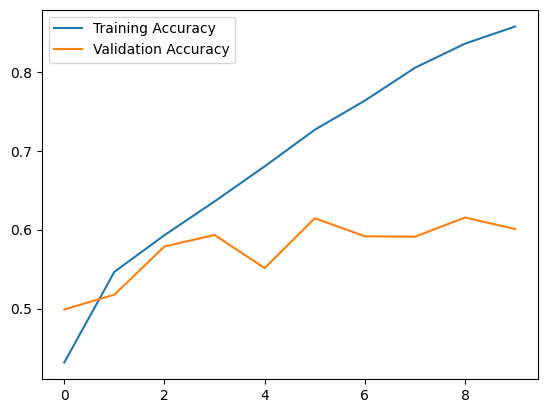

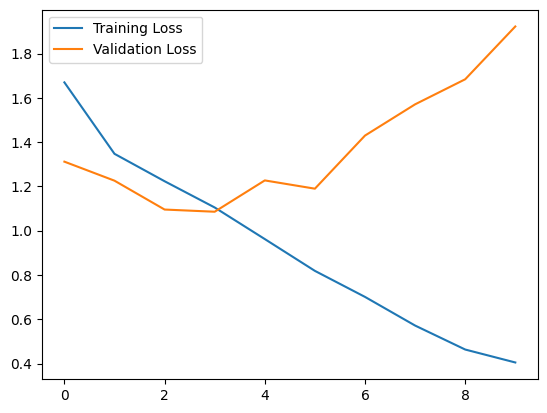

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
model.save("skin_cnn_model.keras")       